In [25]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import matplotlib.animation as animation
from JSAnimation.IPython_display import display_animation
import math
import itertools as itool

class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.y = x
        self.v = v
        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt, wd, f0): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.wd=wd
        self.f0=f0
        self.time=0.
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x + self.f0*math.cos(wd*self.time) 
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x

        for p in self.particles:
            p.move(self.dt)
        
        self.time+=self.dt
            
    def energy(self):
        # Challenge
        return (ke,pe)

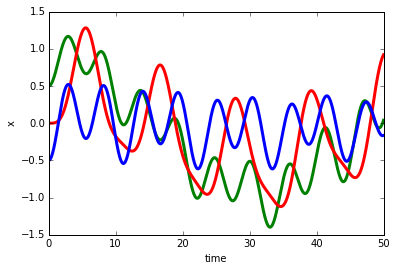

In [59]:
N = 3
k = 1.0
kc = 0.2
dt = 0.01
wd=.1
f0=1.
tmax = 50
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt, wd, f0)
S.particles[0].x = 0.5
S.particles[1].x = 0.
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)
pyplot.plot(t, x[2,], color='blue', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

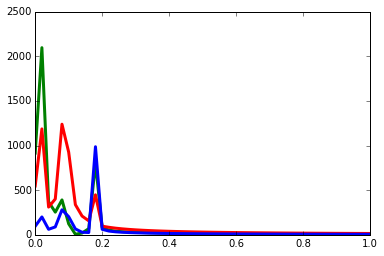

In [61]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u2), color='blue', ls='-', lw=3)
pyplot.xlim(0,1);